In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [15]:
housing_data=pd.read_csv('datas/real_state/housing_train.csv')

In [16]:
housing_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [17]:
housing_data.set_index('Id',inplace=True)

In [18]:
# we will try with vector and matrix mehod
# X and y are matrices and constants are in theta matrix
def linear_regressor_model(data_x:np.ndarray,data_y:np.ndarray,learning=0.001,epochs=1000):
    
    m=data_y.size
    
#   preprocessing(taking preliminary values of coef and intercept as 1 and adding one more column in data_x for mat_mul with intercept and making Y as )
#   ===============================
    theta=np.ones(data_x.shape[1]+1)
    data_x=np.insert(data_x,0,np.ones(data_x.shape[0]),axis=1)
#   ===============================

#   predicting y
#   ===============================
    cost_list=[]
    for i in range(epochs):
        y_pred=np.matmul(data_x,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-data_y))#calculating cost
        d_theta=(1/m)*np.dot(data_x.T,(y_pred-data_y))#calculating d_theta
        
        cost_list.append(cost)
        if(i%(epochs//10)==0):
#             print(d_theta)
            print(cost)
        
        theta=theta-learning*d_theta
    plt.plot(cost_list)
    print(data_x.shape,data_y.shape,y_pred.shape)
    return theta[0],theta[1:],y_pred #returns intecept,coefficients and trained data
#   this is a better model

In [19]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1200 entries, 1 to 1201
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1200 non-null   int64  
 1   MSZoning       1200 non-null   int64  
 2   LotArea        1200 non-null   int64  
 3   Street         1200 non-null   int64  
 4   LotShape       1200 non-null   int64  
 5   LandContour    1200 non-null   int64  
 6   Utilities      1200 non-null   int64  
 7   LotConfig      1200 non-null   int64  
 8   LandSlope      1200 non-null   int64  
 9   Neighborhood   1200 non-null   int64  
 10  Condition1     1200 non-null   int64  
 11  Condition2     1200 non-null   int64  
 12  BldgType       1200 non-null   int64  
 13  HouseStyle     1200 non-null   int64  
 14  OverallQual    1200 non-null   int64  
 15  OverallCond    1200 non-null   int64  
 16  YearBuilt      1200 non-null   int64  
 17  YearRemodAdd   1200 non-null   int64  
 18  RoofStyl

In [20]:
train_data=housing_data.values
X=train_data[:,:-1]
Y=train_data[:,-1]

281146797.4991918
1.393664766811998e+19
7.464515092348266e+29
3.998350872662612e+40
2.1417079193878535e+51
1.1472011733002782e+62
6.1449580501052734e+72
3.2915333697684297e+83
1.7631026666021764e+94
9.444020958530942e+104
(1200, 70) (1200,) (1200,)


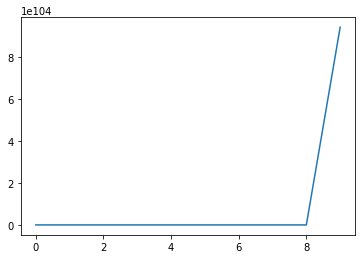

In [21]:
intercept,coefficients,trained=linear_regressor_model(X,Y,learning=.001,epochs=10)

In [ ]:
multiple_linear_regressor_loss(Y,trained)

In [ ]:
lr=linear_model.LinearRegression()

In [ ]:
lr.fit(X,Y)

In [ ]:
print (lr.intercept_)

In [ ]:
multiple_linear_regressor_loss(lr.predict(X),Y)